# TNM112 -- Lab 3

### Imports and data generation
Load cifar-10 dataset and convert to grayscale

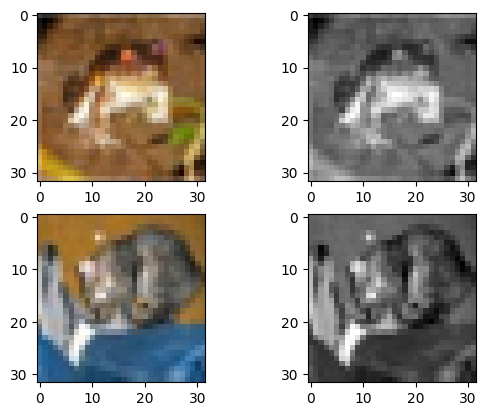

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.datasets import cifar10
from keras import layers, models
import random

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalizing
x_train = x_train.astype("float32")/255
x_test = x_test.astype("float32")/255

# Convert to grayscale
# Standard luminance weights (0.2989, 0.5870, 0.1140)
x_train_grayscale = np.dot(x_train[:,:,:], [0.2989, 0.5870, 0.1140])
x_test_grayscale = np.dot(x_test[:,:,:], [0.2989, 0.5870, 0.1140])


# Print images to check grayscale works
plt.subplot(2,2,1)
plt.imshow(x_train[0])

plt.subplot(2,2,2)
plt.imshow(x_train_grayscale[0], cmap='gray')

plt.subplot(2,2,3)
plt.imshow(x_test[0])

plt.subplot(2,2,4)
plt.imshow(x_test_grayscale[0], cmap='gray')

plt.show()

## Build Model

In [59]:
# Input
x = layers.Input(shape=(32,32,1))

conv1 = layers.Conv2D(64, (3,3), padding="same", activation="relu")(x)
conv1 = layers.Conv2D(64, (3,3), padding="same", activation="relu")(conv1)
pool1 = layers.MaxPooling2D(pool_size=(2,2))(conv1)

conv2 = layers.Conv2D(128, (3,3), padding="same", activation="relu")(pool1)
conv2 = layers.Conv2D(128, (3,3), padding="same", activation="relu")(conv2)
pool2 = layers.MaxPooling2D(pool_size=(2,2))(conv2)

conv3 = layers.Conv2D(256, (3,3), padding="same", activation="relu")(pool2)
conv3 = layers.Conv2D(256, (3,3), padding="same", activation="relu")(conv3)

upSample1 = layers.UpSampling2D(size=(2,2))(conv3)
conv4 = layers.Conv2D(128, (3,3), padding="same", activation="relu")(upSample1)
conv4 = layers.Conv2D(128, (3,3), padding="same", activation="relu")(conv4)

upSample2 = layers.UpSampling2D(size=(2,2))(conv4)
conv5 = layers.Conv2D(64, (3,3), padding="same", activation="relu")(upSample2)
conv5 = layers.Conv2D(64, (3,3), padding="same", activation="relu")(conv5)

# Output
y = layers.Conv2D(3, (1,1), activation="sigmoid")(conv5)

model = models.Model(inputs=x, outputs=y)
model.summary()

model.compile(loss="mean_squared_error", optimizer="adam")


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 32, 32, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_55 (Conv2D)              │ (None, 32, 32, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_56 (Conv2D)              │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_57 (Conv2D)              │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_58 (Conv2D)              │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_59 (Conv2D)              │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_60 (Conv2D)              │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_10 (UpSampling2D) │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_61 (Conv2D)              │ (None, 16, 16, 128)    │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_62 (Conv2D)              │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_11 (UpSampling2D) │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_63 (Conv2D)              │ (None, 32, 32, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_64 (Conv2D)              │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_65 (Conv2D)              │ (None, 32, 32, 3)      │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,697,795 (6.48 MB)

 Trainable params: 1,697,795 (6.48 MB)

 Non-trainable params: 0 (0.00 B)

## Training model

In [60]:
epochs = 5
batch_size = 32

model.fit(x_train_grayscale, x_train, epochs=epochs, batch_size=batch_size, validation_split=0.1)

Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 36s 22ms/step - loss: 0.0170 - val_loss: 0.0072
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 24s 17ms/step - loss: 0.0073 - val_loss: 0.0066
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 24s 17ms/step - loss: 0.0066 - val_loss: 0.0066
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 25s 17ms/step - loss: 0.0063 - val_loss: 0.0064
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 24s 17ms/step - loss: 0.0062 - val_loss: 0.0060


## Colorization

In [61]:

colorized_images = model.predict(x_test_grayscale)


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


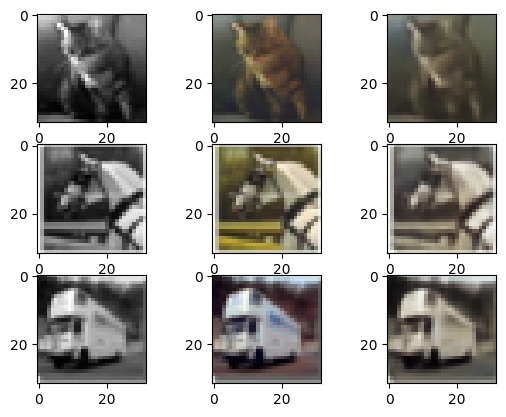

In [79]:
img_num = 3

for i in range(img_num):
  index = random.randint(0,10000)

  plt.subplot(img_num,3,1 + i*3)
  plt.imshow(x_test_grayscale[index], cmap='gray')

  plt.subplot(img_num,3,2 + i*3)
  plt.imshow(x_test[index])

  plt.subplot(img_num,3,3 + i*3)
  plt.imshow(colorized_images[index])

plt.show()